In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Imports

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
from datetime import datetime

from src.api_fetcher import TrafficFetcher, SystemFetcher
from src.enriched_data_handler import EnrichedDataLoader
from src.availability import DataAvailabilityMapper

# Graph parameters
plt.rcParams['figure.figsize'] = [15, 5]
bimensual_locator = mdates.WeekdayLocator(byweekday=mdates.MO, interval=2) #monday every 2 weeks

## Get data
### Get traffic data for all cameras

In [2]:
#start_date = '2024-01-01 00:00:00Z'
#end_date = '2024-01-15 00:00:00Z'
#
#start_day = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%SZ').strftime('%Y%m%d')
#end_day = datetime.strptime(end_date, '%Y-%m-%d %H:%M:%SZ').strftime('%Y%m%d')
#traffic = TrafficFetcher(time_start=start_date,time_end=end_date,level="instances")
#traffic_data = traffic.get_all_traffic(waiting_time=5)
#traffic_data.to_csv(f"data/{start_day}_{end_day}.csv", index_label=False)

### Retrieve Telraam sensors

In [3]:
data_loader = EnrichedDataLoader()
raw_data = data_loader.get_raw_data()
enriched_data = data_loader.get_enriched_data()

## Availability

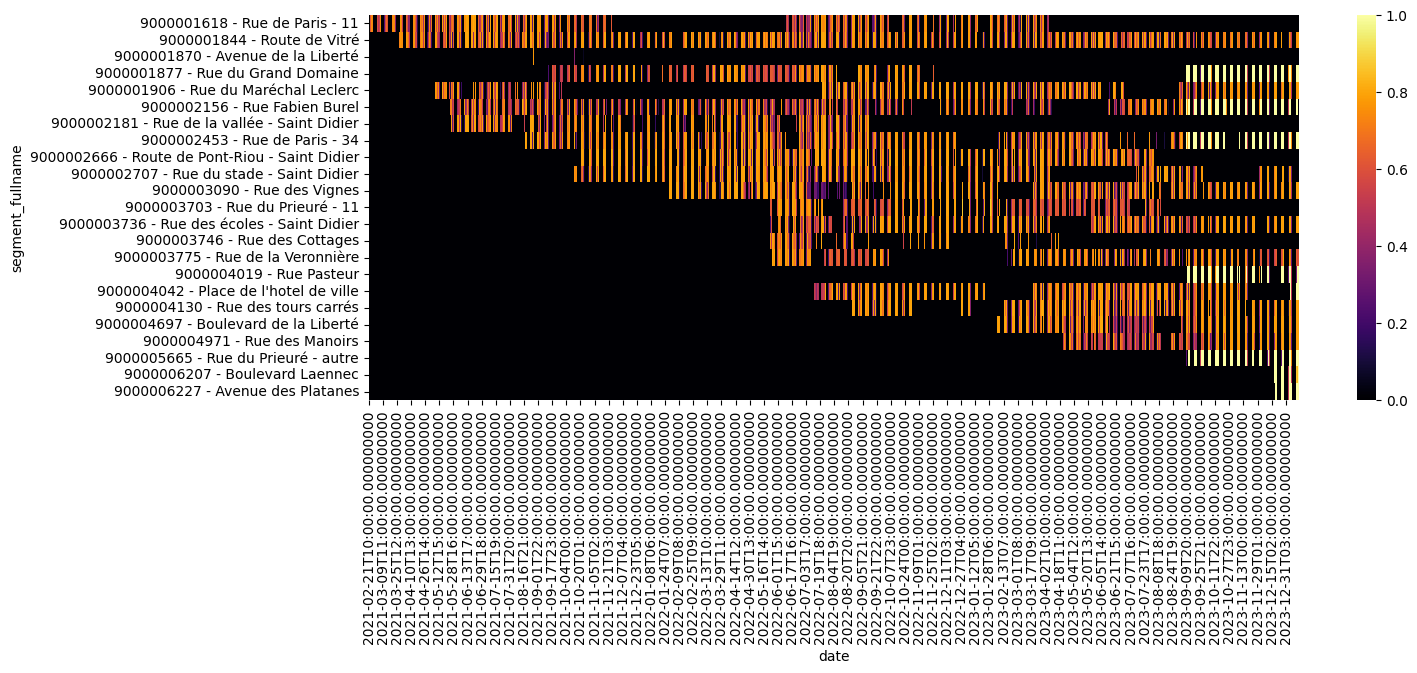

In [4]:
availability_mapper = DataAvailabilityMapper(enriched_data)
availability_mapper.heatmap_availability()

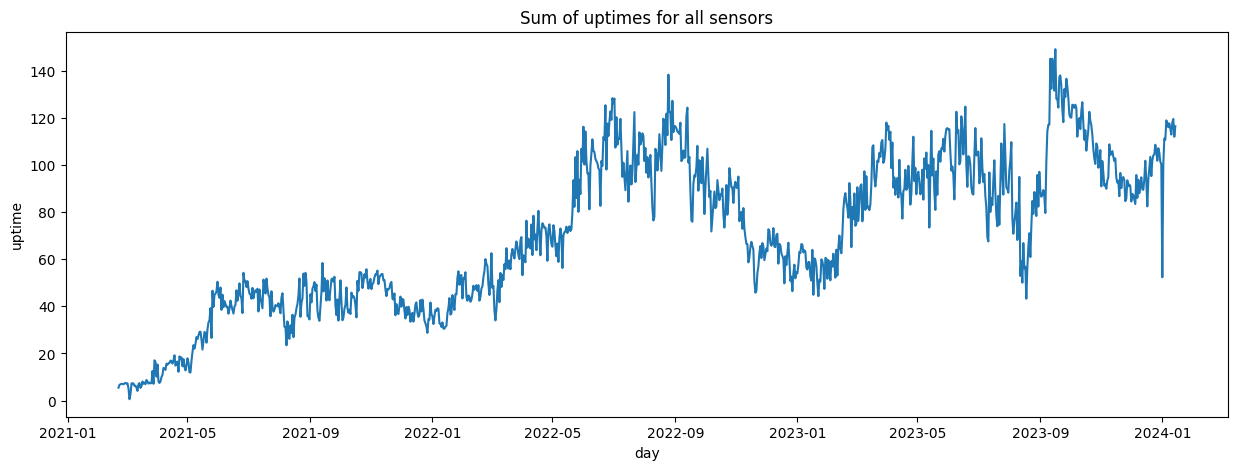

In [5]:
availability_mapper.evolution_sum_uptime()

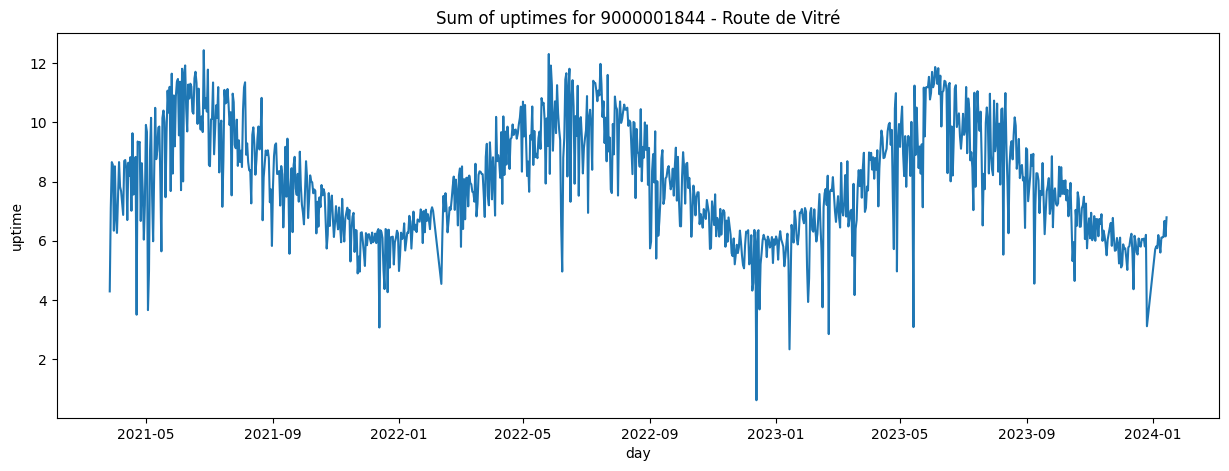

In [6]:
sensors = ['9000001844 - Route de Vitré']
availability_mapper.evolution_sum_uptime(sensors)

## Explore avaiblable combinations

In [5]:
top_combinaisons = availability_mapper.best_combinations(uptime_threshold = 6.5)
top_combinaisons

,combinations,available_days,combination_length
0,"(9000001844 - Route de Vitré, 9000002453 - Rue...",584,2
1,"(9000001844 - Route de Vitré, 9000002453 - Rue...",418,3
2,"(9000001844 - Route de Vitré, 9000002453 - Rue...",323,4
3,"(9000001844 - Route de Vitré, 9000001906 - Rue...",201,5
4,"(9000001844 - Route de Vitré, 9000001906 - Rue...",161,6
5,"(9000001844 - Route de Vitré, 9000001877 - Rue...",119,7
6,"(9000001844 - Route de Vitré, 9000001906 - Rue...",96,8
7,"(9000001844 - Route de Vitré, 9000001906 - Rue...",67,9
8,"(9000001618 - Rue de Paris - 11, 9000001844 - ...",60,10
9,"(9000001844 - Route de Vitré, 9000001877 - Rue...",49,11


### Explore x instances

In [21]:
combination_length = 10
top_data = availability_mapper.best_combinations_details(combination_length, uptime_threshold=6.5)

#### Weekday repartition

Text(0, 0.5, 'Number of available days')

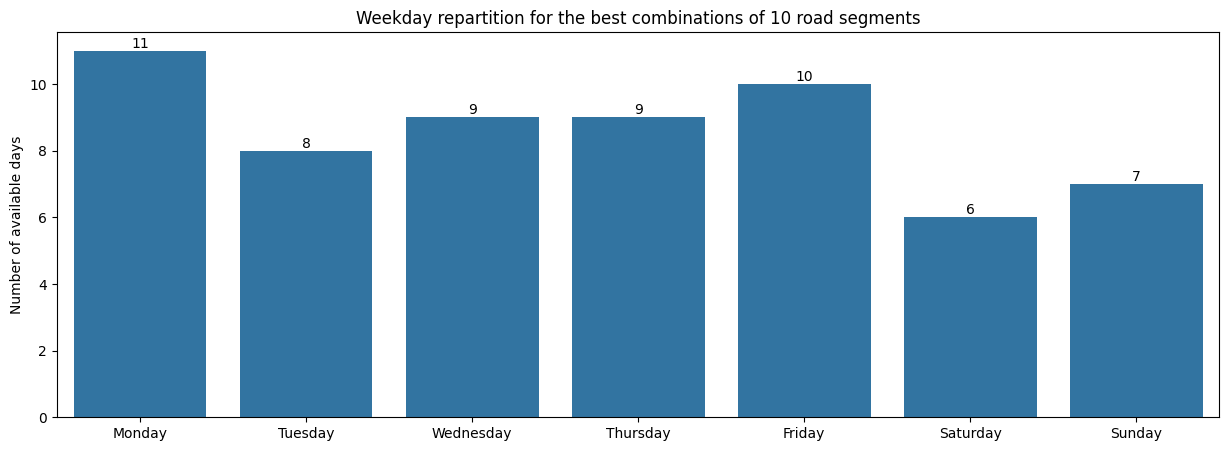

In [22]:
weekday_repartition = top_data.groupby('weekday')['day'].nunique().to_dict()
ax = sns.barplot(weekday_repartition, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.bar_label(ax.containers[0])
ax.set(title=f'Weekday repartition for the best combinations of {combination_length} road segments')
ax.set_ylabel('Number of available days')

#### Data Quality

/tmp/ipykernel_215361/2133165182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_data['rank'] = top_data.groupby(['weekday'])['day'].rank(method="dense")


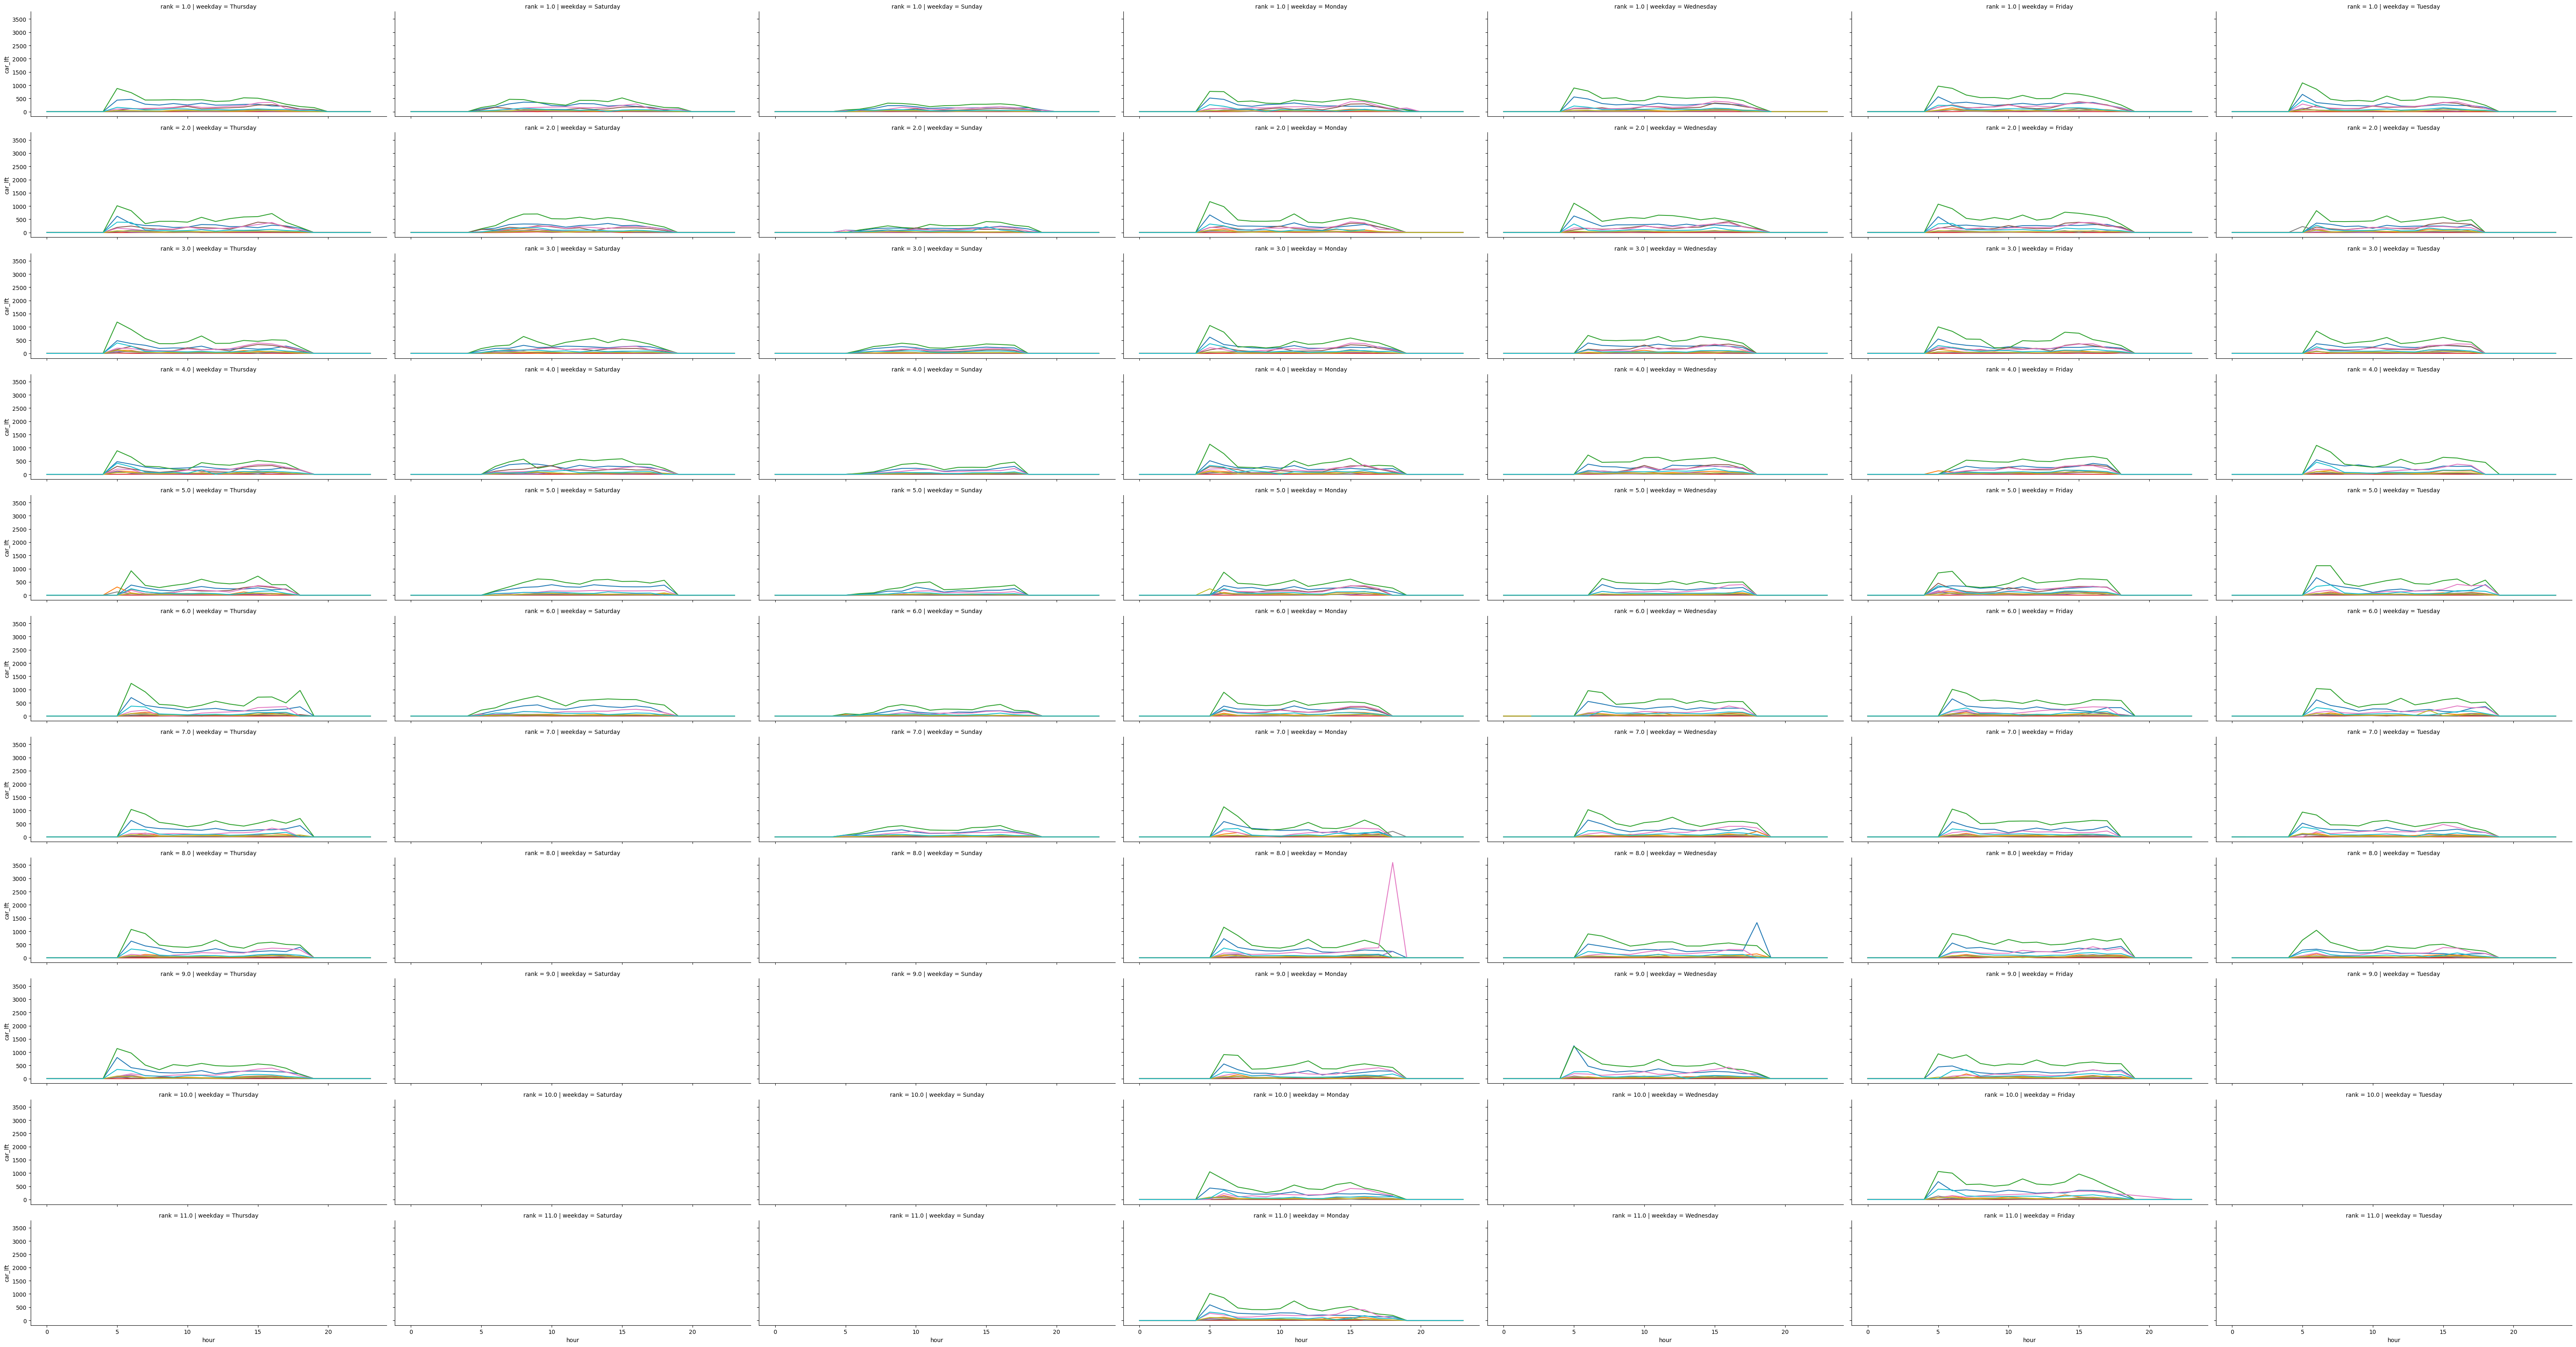

In [24]:
top_data['rank'] = top_data.groupby(['weekday'])['day'].rank(method="dense")
g = sns.FacetGrid(top_data, row="rank", col = 'weekday', aspect = 3)
g.map_dataframe(sns.lineplot, x='hour', y='car_lft', hue='segment_fullname')